In [35]:
from sklearn.datasets import make_moons
from matplotlib import pyplot
from pandas import DataFrame

import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
import numpy as np

## **Generate test dataset**

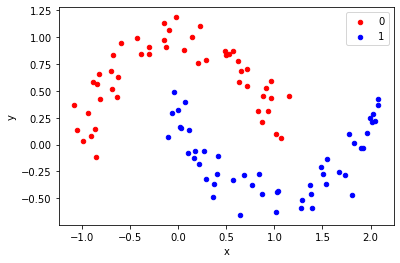

In [36]:
# generate 2d classification dataset
X, y = make_moons(n_samples=100, noise=0.1)
# split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)  # 70% training and 30% test

# scatter plot, dots colored by class value
df = DataFrame(dict(x=X[:,0], y=X[:,1], label=y))
colors = {0:'red', 1:'blue'}
fig, ax = pyplot.subplots()
grouped = df.groupby('label')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
pyplot.show()

## **Create Models**

In [37]:
# Create model 1 (with 1 neuron)
model_1 = Sequential()
model_1.add(Dense(units=1, activation='sigmoid', input_dim=2))
model_1.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Create model 2 (with 2 + 2 + 1 neurons)
model_2 = tf.keras.models.Sequential()
model_2.add(tf.keras.layers.Dense(2, input_dim=2, activation='relu'))
model_2.add(tf.keras.layers.Dense(2, activation='relu'))
model_2.add(tf.keras.layers.Dense(1, activation='sigmoid'))
model_2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Create model 3 (with 10 + 10 + 1 neurons)
model_3 = tf.keras.models.Sequential()
model_3.add(tf.keras.layers.Dense(10, input_dim=2, activation='relu'))
model_3.add(tf.keras.layers.Dense(10, activation='relu'))
model_3.add(tf.keras.layers.Dense(1, activation='sigmoid'))
model_3.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

## **Test Models**

In [38]:
def test_model(model):
  history = model.fit(X_train, y_train, batch_size=5, epochs=100, verbose=1)
  print(model_1.predict(X_train))
  pred = model_1.predict(X_test)
  return history, pred

In [24]:
history_1, pred_1 = test_model(model_1) # Test model 1
print("\n\n MODEL 2")
history_2, pred_2 = test_model(model_2) # Test model 2
print("\n\n MODEL 3")
history_3, pred_3 = test_model(model_3) # Test model 3

Epoch 1/100
14/14 [==============================] - 0s 2ms/step - loss: 0.3193 - accuracy: 0.8714
Epoch 2/100
14/14 [==============================] - 0s 2ms/step - loss: 0.3187 - accuracy: 0.8714
Epoch 3/100
14/14 [==============================] - 0s 2ms/step - loss: 0.3180 - accuracy: 0.8714
Epoch 4/100
14/14 [==============================] - 0s 2ms/step - loss: 0.3174 - accuracy: 0.8714
Epoch 5/100
14/14 [==============================] - 0s 2ms/step - loss: 0.3167 - accuracy: 0.8714
Epoch 6/100
14/14 [==============================] - 0s 2ms/step - loss: 0.3160 - accuracy: 0.8714
Epoch 7/100
14/14 [==============================] - 0s 2ms/step - loss: 0.3154 - accuracy: 0.8714
Epoch 8/100
14/14 [==============================] - 0s 2ms/step - loss: 0.3147 - accuracy: 0.8714
Epoch 9/100
14/14 [==============================] - 0s 2ms/step - loss: 0.3141 - accuracy: 0.8714
Epoch 10/100
14/14 [==============================] - 0s 3ms/step - loss: 0.3135 - accuracy: 0.8714
Epoch 11/

## **Show results**

In [39]:
def plot_loss_accuracy(model_name, history, loss_accuracy):
  pyplot.plot(history.history[loss_accuracy])
  pyplot.title(model_name + loss_accuracy)
  pyplot.ylabel(loss_accuracy)
  pyplot.xlabel('epoch')
  pyplot.legend(['train', 'test'], loc='upper left')
  pyplot.show()

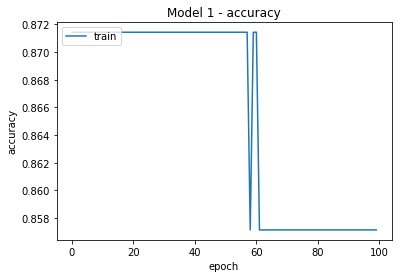

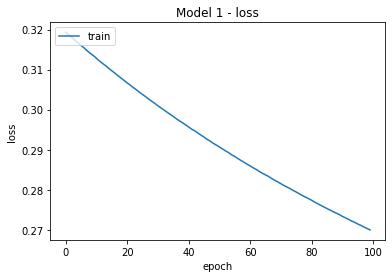

In [40]:
# Accuracy and loss of Model 1
plot_loss_accuracy('Model 1 - ', history_1, 'accuracy')
plot_loss_accuracy('Model 1 - ', history_1, 'loss')

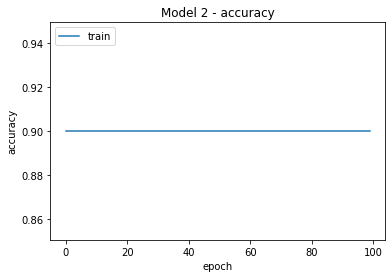

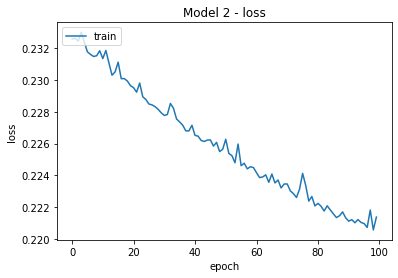

In [41]:
# Accuracy and loss of Model 2
plot_loss_accuracy('Model 2 - ', history_2, 'accuracy')
plot_loss_accuracy('Model 2 - ', history_2, 'loss')

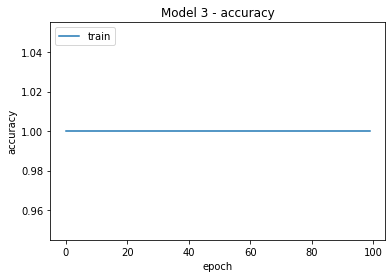

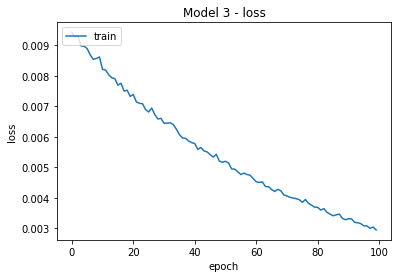

In [42]:
# Accuracy and loss of Model 3
plot_loss_accuracy('Model 3 - ', history_3, 'accuracy')
plot_loss_accuracy('Model 3 - ', history_3, 'loss')